In [213]:
import numpy as np
import matplotlib.pyplot as plt

First of all: we are going to introduce a dataset on that we apply our clustering method on:

In [230]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    epsilon = 0.1
    n = (np.random.rand(n_points,1)+epsilon) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise

    # hstack/vstack stacks data on top of each other (print shape to see what I mean)
    C_1 = np.hstack((d1x,d1y))
    C_2 = np.hstack((-d1x,-d1y))
    return np.vstack((C_1, C_2))

This is a dataset consisting of clusters twisting around each other. You don't need to understand the mathematics behind it, but you can play around with it if you like (make sure to train on the original dataset, not one you created)



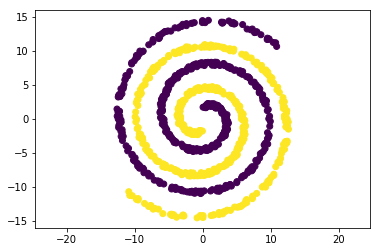

In [231]:
data_size = 500

dataset = twospirals(data_size)
labels = np.hstack((np.zeros(data_size),np.ones(data_size)))

# scatter makes a 2D scatter plot. Unfortunately you have to seperate the x-dim from the y-dim
# the labels are helpful for coloring. The algorithm does not use them, since this is unsupervised
plt.scatter(dataset[:,0], dataset[:,1], c = labels)
plt.axis('equal')
plt.show()

a) Implement the DBSCAN algorithm to classify points of the two clusters.

b) Plot a scatter plot highlighting the clusters that were found after finding good hyperparameter values eps and minPts.

c) Print accuracies for different data_size values.

d) For what kind of data_size values does the algorithm fail and why? What would you say are disadvantages of DBSCAN?

(1000, 2)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

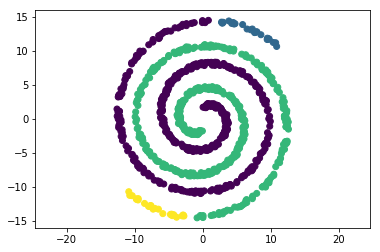

In [248]:
import sys 
  
# the setrecursionlimit function is 
# used to modify the default recursion 
# limit set by python. Using this,  
# we can increase the recursion limit 
# to satisfy our needs 
  
sys.setrecursionlimit(10**6) 


class DBSCAN:
    def __init__(self, Eps , MinPt ):
        self.Eps = Eps
        self.MinPt = MinPt
        
    def euclidean_distance(self, x_1, x_2):
          return np.sqrt(np.sum((x_1-x_2)**2, axis = 1))
    
    def findNeighbohrs(self, data, P):
        distances = self.euclidean_distance(data, P)
        neighbohrs = []
        for i, d in enumerate(distances):
            if d<self.Eps: neighbohrs.append(i)
        #print(np.partition(distances, 1)[0:2])
        return neighbohrs

        
    
    # Fit the data into the DBSCAN model
    def fit(self, data):
        C = 0
        fitted_labels = [0]*data.shape[0]
        for i,point in enumerate(data):
            if fitted_labels[i]:
                #print("I am passing")
                continue   
            neighbors = self.findNeighbohrs(data, point)
            if len(neighbors) < self.MinPt:
                fitted_labels[i] = -1
                #print("I am passing Noise")
                continue
            C += 1
            fitted_labels[i] = C 
            my_neighbohrs = [n for n in neighbors if n!=i]
            for n in my_neighbohrs:
                if fitted_labels[n] == -1: fitted_labels[n] = C
                if fitted_labels[n] != 0: continue
                fitted_labels[n] = C
                neighbohrs_of_neighbohrs = self.findNeighbohrs(data, data[n])
                if len(neighbohrs_of_neighbohrs) >=self.MinPt: 
                    for neighbohr in neighbohrs_of_neighbohrs: my_neighbohrs.append(neighbohr)                        
        return fitted_labels         
                

       
def main(data):
    print(data.shape)
    my_DBSCAN = DBSCAN(1.8, 4)
    my_labels = my_DBSCAN.fit(data)
    print(my_labels)
    plt.scatter(dataset[:,0], dataset[:,1], c = my_labels)
    plt.axis('equal')
    plt.show()
#run  
main(dataset)
        